##### Lending Club Data Project

# 02 Exploratory Data Analysis

In [1]:
reset -fs

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from scipy import stats
import seaborn as sns
import statsmodels.api as sms
import statsmodels.formula.api as smf

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import re 
import math

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)
from scipy import stats
#import warnings
#warnings.filterwarnings("ignore")
#Import of needed packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly.graph_objects as go
from scipy import stats
from numpy import median, mean
import folium

## 02.01 Variable Descriptions

| variable                   | description                                                                                                                                                                                              |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|                                                                     
| addr_state                 | state provided by the borrower in the loan application                                                                                                                                                   |
| annual_inc                 | self-reported annual income provided by the borrower during registration                                                                                                                                                                                                                        
| delinq_amnt                | amount the borrower is now delinquent                                                                                                                                                                    |
| delinq_2yrs                | delinquency in the borrower's credit file for the past 2 years                                                                                                                                           |
| dti                        | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. |
| earliest_cr_line           | The month the borrower's earliest reported credit line was opened                                                                                                                                        |
| emp_length                 | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.                                                                        |
| funded_amnt                | The total amount committed to that loan at that point in time.                                                                                                                                           |
| funded_amnt_inv            | The total amount committed by investors for that loan at that point in time.                                                                                                                             |
| grade                      | LC assigned loan grade                                                                                                                                                                                   |
| home_ownership             | The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.                                                                                      |
| inq_last_6mths             | The number of inquiries in past 6 months (excluding auto and mortgage inquiries)                                                                                                                         |
| installment                | The monthly payment owed by the borrower if the loan originates.                                                                                                                                         |
| int_rate                   | Interest Rate on the loan                                                                                                                                                                                |
| issue_d                    | The month which the loan was funded                                                                                                                                                                      |
| last_credit_pull_d         | The most recent month LC pulled credit for this loan                                                                                                                                                     |
| last_pymnt_amnt            | Last total payment amount received                                                                                                                                                                       |
| last_pymnt_d               | Last month payment was received                                                                                                                                                                          |
| loan_amnt                  | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.                             |
| loan_status                | Current status of the loan <br> * Fully Paid: Principal amount of loans that have been fully paid <br> * Current: Principal amount of loans that are in "current" or "grace period" status <br> * Late: Principal amount of loans that are 16+ days late but have not charged off <br> * Charged off (net): Total amount charged off net of any funds subsequently recovered. <br> Principal and interest payments received prior to charge off and recoveries made after charge off are not included here; they are included in the "Principal Payments Received" or "Interest Payments Received" columns. As a result, the fully paid, current, late, and charged off columns do not add up to 100% for the "% of Issued dollars" view.       |           
| open_acc                   | The number of open credit lines in the borrower's credit file.                                                                                                                        |
| pub_rec                    | Number of derogatory public records                                                                                                                                                                      |
| pub_rec_bankruptcies       | Number of derogatory public records of bankruptcies                                                                                                                                                                      |
| purpose                    | A category provided by the borrower for the loan request.                                                                                                                                                                                                                                     |
| revol_bal                  | Total credit revolving balance                                                                                                                                                                           |
| revol_util                 | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.                                                                                    |
| term                       | The number of payments on the loan. Values are in months and can be either 36 or 60.                                              |
| total_acc                  | The total number of credit lines currently in the borrower's credit file                                                                                                                                 |
| total_pymnt                | Payments received to date for total amount funded                                                                                                                                                        |
| total_pymnt_inv            | Payments received to date for portion of total amount funded by investors                                                                                                                                |
| total_rec_int              | Interest received to date                                                                                                                                                                                |
| total_rec_late_fee         | Late fees received to date                                                                                                                                                                               |
| total_rec_prncp            | Principal received to date                                                                                                                                                                               |
| verification status        | Indicates if the borrowers' income was verified by LC, not verified, or if the income source was verified                                                                                       |
| zip_code                   | The first 3 numbers of the zip code provided by the borrower in the loan application.                                                                                                                    |

## 02.02 Load Data

In [3]:
pd.set_option("display.max_columns", None)
train_data = pd.read_csv('train_data.csv')
train_data.drop('Unnamed: 0', axis = 1, inplace = True)
train_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,loan_status
0,15000.0,15000.0,15000.0,36,0.1422,514.27,C,8 years,RENT,102000.0,Verified,2010-03-01 00:00:00,debt_consolidation,110xx,NY,0.0964,1.0,1996-01-01 00:00:00,1.0,6.0,0.0,916.0,0.0000,37.0,18514.510481,18514.51,15000.0,3514.51,2013-03-01 00:00:00,553.84,2015-11-01 00:00:00,0.0,Fully Paid
1,10000.0,10000.0,9850.0,36,0.1059,325.45,B,3 years,RENT,80038.0,Verified,2011-06-01 00:00:00,debt_consolidation,200xx,DC,0.2272,0.0,2002-07-01 00:00:00,2.0,11.0,0.0,10420.0,0.6020,29.0,11534.483930,11361.47,10000.0,1534.48,2013-07-01 00:00:00,3744.28,2016-06-01 00:00:00,0.0,Fully Paid
2,10000.0,10000.0,9150.0,36,0.0932,319.47,A,3 years,RENT,85000.0,Not Verified,2008-12-01 00:00:00,educational,222xx,VA,0.0781,0.0,2001-10-01 00:00:00,1.0,8.0,0.0,2001.0,0.1210,23.0,10858.473145,9935.50,10000.0,858.47,2010-01-01 00:00:00,7037.84,2010-01-01 00:00:00,0.0,Fully Paid
3,5000.0,5000.0,5000.0,60,0.1969,131.61,E,3 years,OWN,38004.0,Not Verified,2011-05-01 00:00:00,other,930xx,CA,0.0950,0.0,1996-04-01 00:00:00,0.0,2.0,0.0,0.0,0.8131,7.0,7896.960000,7896.96,5000.0,2896.96,2016-05-01 00:00:00,263.58,2016-06-01 00:00:00,0.0,Fully Paid
4,14000.0,14000.0,13750.0,60,0.1038,300.09,B,10+ years,MORTGAGE,58000.0,Verified,2010-08-01 00:00:00,small_business,442xx,OH,0.1043,0.0,1995-02-01 00:00:00,2.0,6.0,0.0,4683.0,0.1750,30.0,15139.723716,14869.37,14000.0,1139.72,2011-07-01 00:00:00,12448.72,2011-06-01 00:00:00,0.0,Fully Paid


## 02. 03. Overview of descriptives

### Numerical data

In [4]:
train_data.describe().round(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,pub_rec_bankruptcies
count,25783.00,25783.00,25783.00,25783.00,25783.00,25783.00,25783.00,25783.00,25783.00,25783.00,25783.00,25783.00,25783.00,25783.00,25783.00,25783.00,25783.00,25783.00,25783.00,25783.00,25783.00
mean,10326.12,10064.26,9417.12,41.45,0.12,303.80,64590.17,0.13,0.14,1.03,9.15,0.06,12866.09,0.49,21.51,10958.07,10289.51,8947.48,1914.68,2341.76,0.04
std,6476.95,6182.14,6154.57,10.05,0.04,186.65,36593.94,0.07,0.43,1.35,4.19,0.23,15118.61,0.28,10.98,7498.30,7454.20,6082.39,1912.47,3638.86,0.21
min,500.00,500.00,0.00,36.00,0.05,15.67,1896.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,33.73,0.00,0.00,6.27,0.00,0.00
25%,5000.00,5000.00,4850.00,36.00,0.09,162.80,40000.00,0.08,0.00,0.00,6.00,0.00,3527.50,0.26,13.00,5320.15,4674.74,4200.00,630.76,208.03,0.00
50%,9000.00,9000.00,8000.00,36.00,0.12,267.74,56508.00,0.13,0.00,1.00,9.00,0.00,8451.00,0.49,20.00,9225.28,8559.69,7800.00,1261.05,516.30,0.00
75%,14400.00,14000.00,12975.00,36.00,0.14,401.60,80000.00,0.19,0.00,2.00,12.00,0.00,16387.50,0.72,28.00,15056.03,14342.41,12000.00,2506.73,3030.70,0.00
max,35000.00,35000.00,34975.00,60.00,0.22,960.11,300000.00,0.28,3.00,8.00,24.00,1.00,123611.00,0.99,60.00,39047.31,38601.14,28000.00,11732.12,20883.56,1.00


### Categorical data

In [5]:
train_data.select_dtypes('object').describe()

,grade,emp_length,home_ownership,verification_status,issue_d,purpose,zip_code,addr_state,earliest_cr_line,last_pymnt_d,last_credit_pull_d,loan_status
count,25783,25783,25783,25783,25783,25783,25783,25783,25783,25783,25783,25783
unique,7,12,5,3,55,14,815,50,498,103,108,2
top,B,10+ years,RENT,Not Verified,2011-12-01 00:00:00,debt_consolidation,100xx,CA,1998-11-01 00:00:00,2013-03-01 00:00:00,2016-06-01 00:00:00,Fully Paid
freq,7788,5414,12670,11830,1290,11843,388,4563,243,670,7108,21876


## 02.04 EDA: Questions of interest

The central question of this analysis is which borrowers should get a credit and which shouldn't. In other words, investors need information on risk factors and most promising invests. Therefore, this EDA focuses connections between the dependent variable, loan_status, and several predictor variables.

### Loan amount

In [6]:
#Definition of bins for loan amount
loan_bins = pd.cut(train_data['loan_amnt'], bins = np.arange(0, 38000, 2000)) #, labels = ['0 - 24 yrs', '25 - 49 yrs', '50 - 74 yrs', '75 - 99 yrs', '>= 100 yrs'])
loan_bins.name = 'loan_bins'
train_data = pd.concat([train_data, loan_bins], axis = 1)

#### Distribution of loan amount

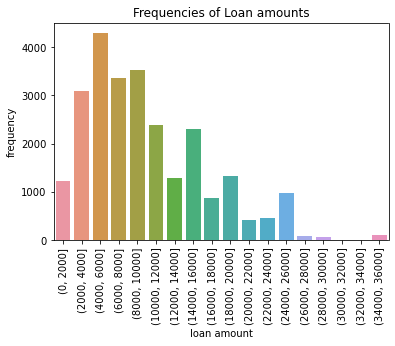

In [7]:
sns.countplot(data = train_data, x = 'loan_bins' ).set(title = 'Frequencies of Loan amounts', xlabel = 'loan amount',ylabel = 'frequency')
plt.xticks (rotation = 90)
plt.savefig('loan_amount.png')

Most borrowers beg for 4000-6000 USD. The distribution is clearly right-skewed.

#### Loan amounts over time

In [8]:
train_data['issue_y'] = pd.to_datetime(train_data.issue_d, infer_datetime_format=True)

In [9]:
train_data.issue_y = train_data.issue_y.dt.year

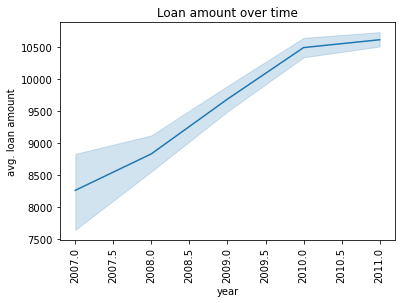

In [10]:
sns.lineplot(data = train_data, y = 'loan_amnt', x = 'issue_y', estimator = mean).set(title = 'Loan amount over time', xlabel = 'year',ylabel = 'avg. loan amount')
plt.xticks (rotation = 90);
plt.savefig('loan_amount_time.png')

The average loan amount has increased over the years. 

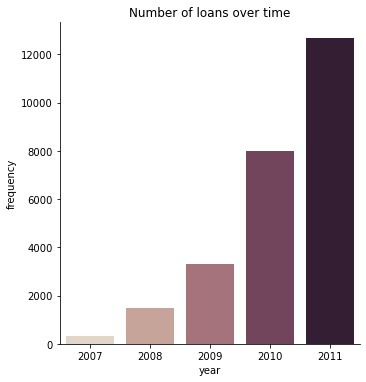

In [11]:
sns.catplot(x="issue_y", kind="count", palette="ch:.25", data=train_data).set(title = 'Number of loans over time', xlabel = 'year',ylabel = 'frequency')
plt.savefig('loans_time.png');

This is also the case for the number of loans. This is not surprising since Lending Club was founded in 2007. That is, in the first two years borrowers (investors) likely didn't know about the platform. 

### Connection between wanted and actually funded loans

/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



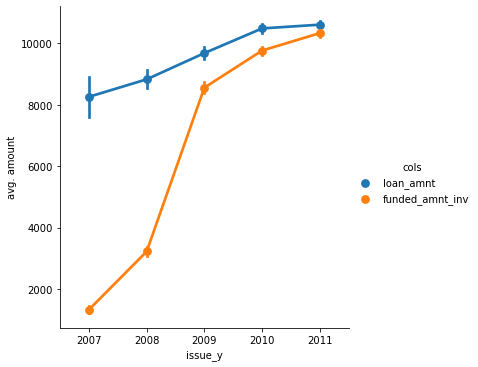

In [12]:
df = train_data[['issue_y', 'loan_amnt', 'funded_amnt_inv']]
df = df.melt('issue_y', var_name = 'cols', value_name = 'avg. amount')
sns.factorplot(x="issue_y", y="avg. amount", hue='cols', data=df);

It is likely that in the early years of lending club, borrowers have had experienced difficulties finding inestors because not many people knew about the platform. LAter on, when the platfrom became more established, the loan amount wanted and the invests increasingly correspond.

### Interest rates

#### Distribution of interest rates

In [13]:
int_bins = pd.cut(x = train_data.int_rate, bins = np.arange(0, 0.30, 0.05))
int_bins.name = 'int_bins'
train_data = pd.concat([train_data, int_bins], axis = 1)

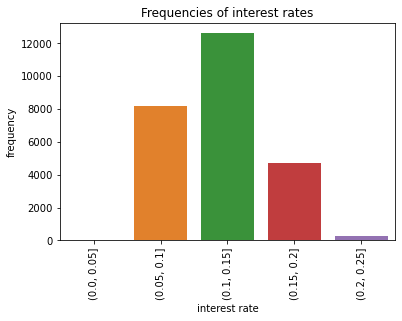

In [14]:
sns.countplot(data = train_data, x = 'int_bins' ).set(title = 'Frequencies of interest rates', xlabel = 'interest rate',ylabel = 'frequency')
plt.xticks (rotation = 90)
plt.savefig('int_rates.png')

#### Interest rates over time

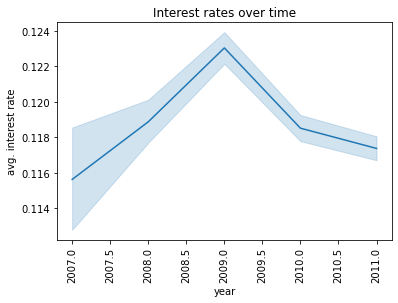

In [15]:
sns.lineplot(data = train_data, y = 'int_rate', x = 'issue_y', estimator = mean).set(title = 'Interest rates over time', xlabel = 'year',ylabel = 'avg. interest rate')
plt.xticks (rotation = 90);
plt.savefig('int_time.png')

### Good vs. bad loans

#### Distribution of loan status

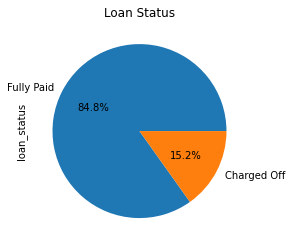

In [16]:
train_data.loan_status.value_counts().plot(kind = 'pie', autopct = '%1.1f%%').set(title = 'Loan Status'); 
plt.savefig('status.png')

#### Loan status and grade

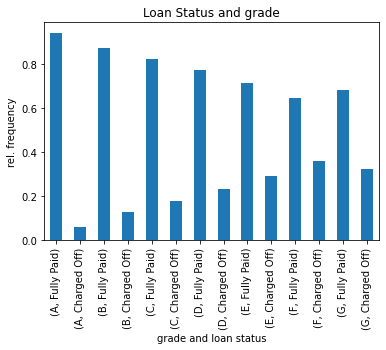

In [17]:
train_data.groupby(["grade"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan Status and grade', xlabel = 'grade and loan status', ylabel = 'rel. frequency');
plt.savefig('status_grade.png')

Not surprisingly, the lower the grade, the more often borrowers do not pay back fully. 

#### Loan status and average loan amount over time

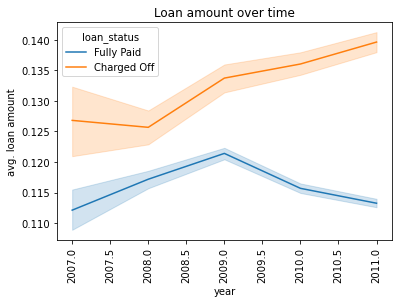

In [18]:
sns.lineplot(data = train_data, y = 'int_rate', x = 'issue_y', hue = 'loan_status', estimator = mean).set(title = 'Loan amount over time', xlabel = 'year',ylabel = 'avg. loan amount')
plt.xticks (rotation = 90);
plt.savefig('int_rate_time_status.png')

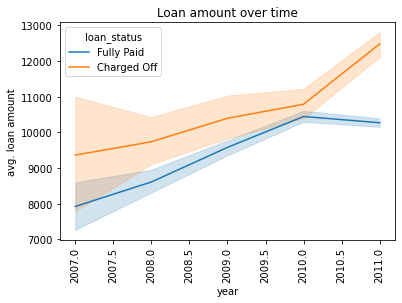

In [19]:
sns.lineplot(data = train_data, y = 'loan_amnt', x = 'issue_y', hue = 'loan_status', estimator = mean).set(title = 'Loan amount over time', xlabel = 'year',ylabel = 'avg. loan amount')
plt.xticks (rotation = 90);
plt.savefig('loan_amount_time_status.png')

#### Loan status and interest rates

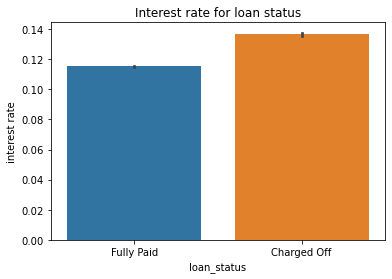

In [26]:
sns.barplot(data = train_data, y = 'int_rate', x = 'loan_status').set(title = 'Interest rate for loan status', xlabel = 'loan_status', ylabel = 'interest rate');
plt.savefig('int_loan.png')

#### Loan status and grade and interest rates

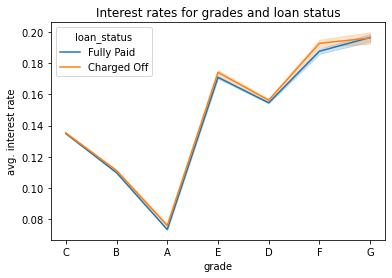

In [27]:
sns.lineplot(data = train_data, y = 'int_rate', x = 'grade', hue = 'loan_status', estimator = mean).set(title = 'Interest rates for grades and loan status', xlabel = 'grade', ylabel = 'avg. interest rate');
plt.savefig('int_rate_grade_status.png')

#### Loan status over time

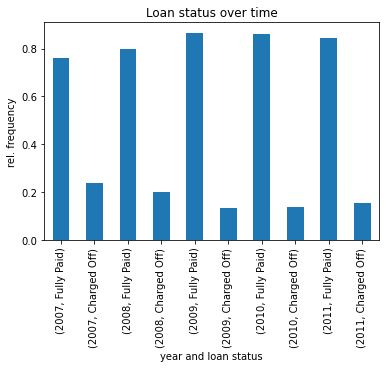

In [28]:
train_data.groupby(["issue_y"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status over time', xlabel = 'year and loan status', ylabel = 'rel. frequency');
plt.savefig('loan_time.png')

#### Annual income over time

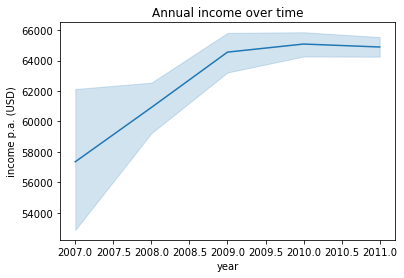

In [29]:
sns.lineplot(data = train_data, y = 'annual_inc', x = 'issue_y', estimator = mean).set(title = 'Annual income over time', xlabel = 'year',ylabel = 'income p.a. (USD)');
plt.savefig('income_time.png')

#### Loan status and income over time

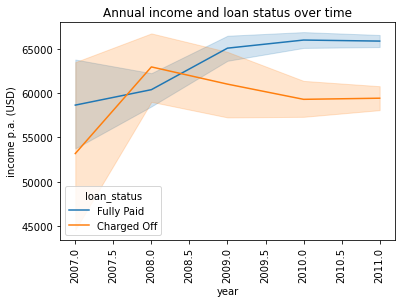

In [30]:
sns.lineplot(data = train_data, y = 'annual_inc', x = 'issue_y', hue = 'loan_status', estimator = mean).set(title = 'Annual income and loan status over time', xlabel = 'year',ylabel = 'income p.a. (USD)')
plt.xticks (rotation = 90);
plt.savefig('income_status_time.png')

#### Dept/ income ratio and loan status

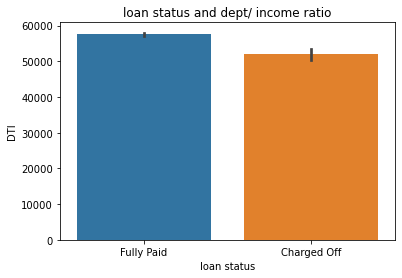

In [31]:
sns.barplot(data = train_data, y = 'annual_inc', x = 'loan_status', estimator =  median).set(title = 'loan status and dept/ income ratio', xlabel = 'loan status',ylabel = 'DTI');
plt.savefig('dti_loanstatus.png')

In [32]:
dti_bins = pd.cut(x = train_data.dti, bins = np.arange(0, 0.4, 0.1))
dti_bins.name ='dti_bins'
train_data = pd.concat([train_data, dti_bins], axis = 1)

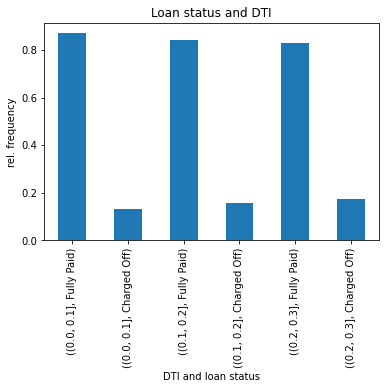

In [33]:
train_data.groupby(["dti_bins"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and DTI', xlabel = 'DTI and loan status', ylabel = 'rel. frequency');
plt.savefig('dti_bins_loan.png')

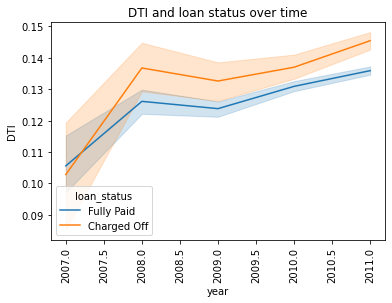

In [34]:
sns.lineplot(data = train_data, y = 'dti', x = 'issue_y', hue = 'loan_status', estimator = mean).set(title = 'DTI and loan status over time', xlabel = 'year',ylabel = 'DTI')
plt.xticks (rotation = 90);
plt.savefig('dti_loanstatus_time.png')

#### Loan status and annual income

In [35]:
inc_bins = pd.cut(x = train_data.annual_inc, bins = np.arange(0, 320000, 50000))
inc_bins.name = 'inc_bins'
train_data = pd.concat([train_data, inc_bins], axis = 1)

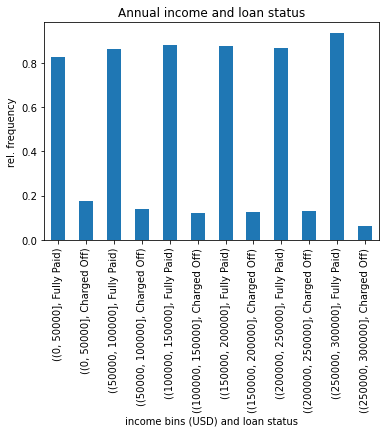

In [36]:
train_data.groupby(["inc_bins"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Annual income and loan status', xlabel = 'income bins (USD) and loan status',ylabel = 'rel. frequency')
plt.xticks (rotation = 90);
plt.savefig('income_status_time.png')

#### Loan status and working time for employer

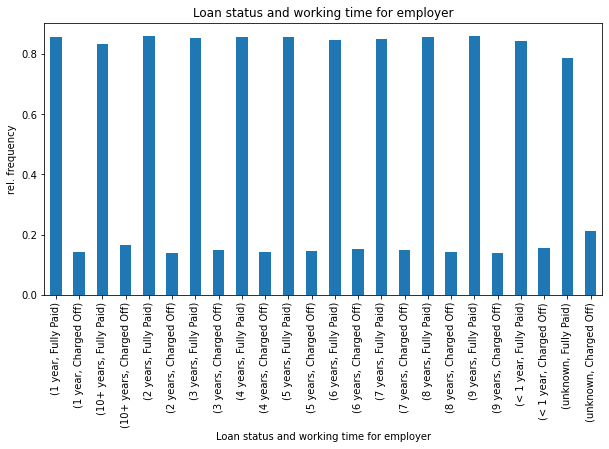

In [37]:
plt.figure(figsize = (10, 5))
train_data.groupby(["emp_length"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and working time for employer', xlabel = 'Loan status and working time for employer', ylabel = 'rel. frequency');

#### Loan status and verification status

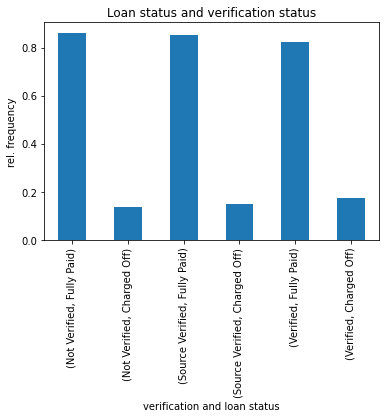

In [38]:
train_data.groupby(["verification_status"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and verification status', xlabel = 'verification and loan status', ylabel = 'rel. frequency');
plt.savefig('verification_loanstatus.png')

#### Loan status and term

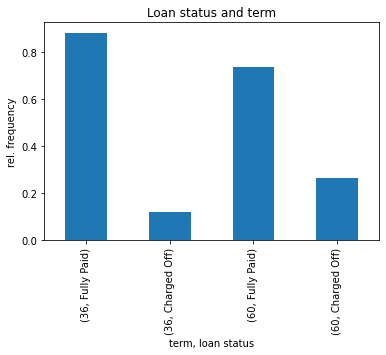

In [39]:
train_data.groupby(["term"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and term', xlabel = 'term, loan status', ylabel = 'rel. frequency');
plt.savefig('term.png')

#### Loan status and home ownership

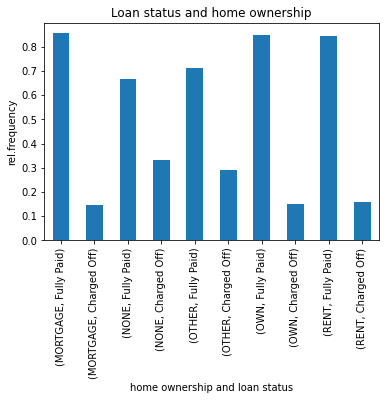

In [43]:
train_data.groupby(["home_ownership"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and home ownership', xlabel = 'home ownership and loan status', ylabel = 'rel.frequency');
plt.savefig('home_loan.png')

In [ ]:
#!pip install geopandas==0.3.0
#!pip install pyshp==1.2.10
#!pip install shapely==1.6.3

In [ ]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)
train_data['state_count'] = train_data['addr_state'].groupby(train_data['addr_state']).transform('count')
data = dict(type='choropleth',
            locations = train_data['addr_state'],
            locationmode = 'USA-states',
            colorscale = 'blues',
            #text = train_data['loan_status'],
            z = train_data['state_count'],
            colorbar = {'title':"State Count"}
            )
layout = dict(title = 'State Location in USA Map',
              geo = dict(scope='usa')
             )
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

#### Loan status and inquiries in the last 6 months

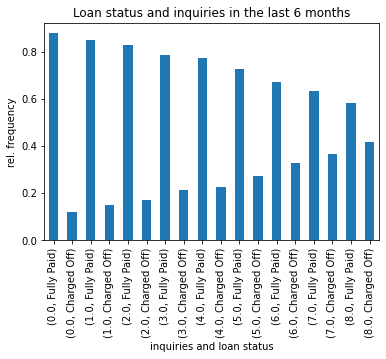

In [46]:
train_data.groupby(["inq_last_6mths"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and inquiries in the last 6 months', xlabel = 'inquiries and loan status', ylabel = 'rel. frequency');
plt.savefig('inq_loan.png')

#### Loan status and number of derogatory public records

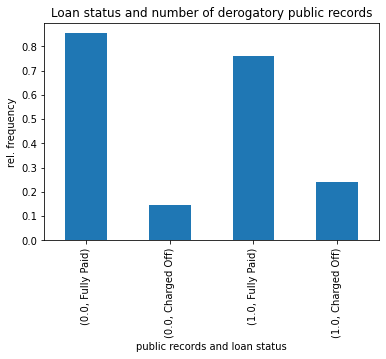

In [51]:
train_data.groupby(["pub_rec"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and number of derogatory public records', xlabel = 'public records and loan status', ylabel = 'rel. frequency');
plt.savefig('pub_rec_loan.png')

#### Loan status and bankruptcy records

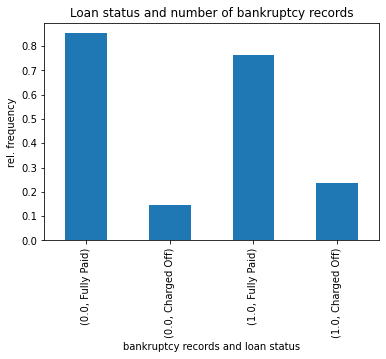

In [53]:
train_data.groupby(["pub_rec_bankruptcies"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and number of bankruptcy records', xlabel = 'bankruptcy records and loan status', ylabel = 'rel. frequency');
plt.savefig('pub_rec_bank_loan.png')

#### Loan status and purpose

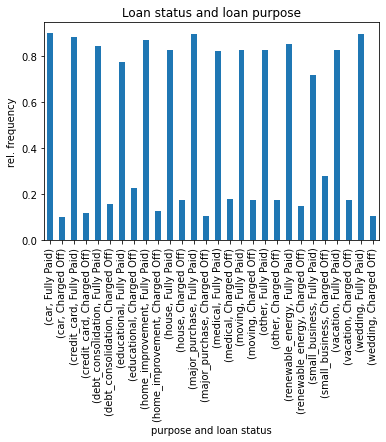

In [54]:
train_data.groupby(["purpose"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and loan purpose', xlabel = 'purpose and loan status', ylabel = 'rel. frequency');
plt.savefig('purpose_loan.png')

#### Loan status and total number of credit lines

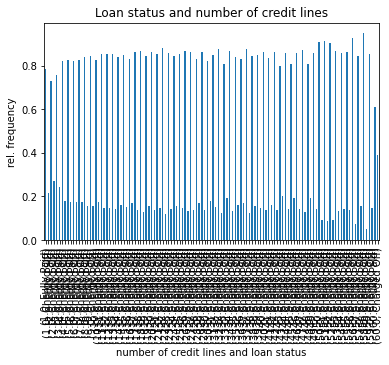

In [59]:
train_data.groupby(["total_acc"])["loan_status"].value_counts(normalize=True,dropna=False).plot(kind = "bar").set(title = 'Loan status and number of credit lines', xlabel = 'number of credit lines and loan status', ylabel = 'rel. frequency');
plt.savefig('accloan.png')

## 02.05 Overall correlations of numerical variables

For feature engineering, it is important to know which predictive variables correlate (--> multicollinearity). Therefore, a heatmap with correlations is displayed below.

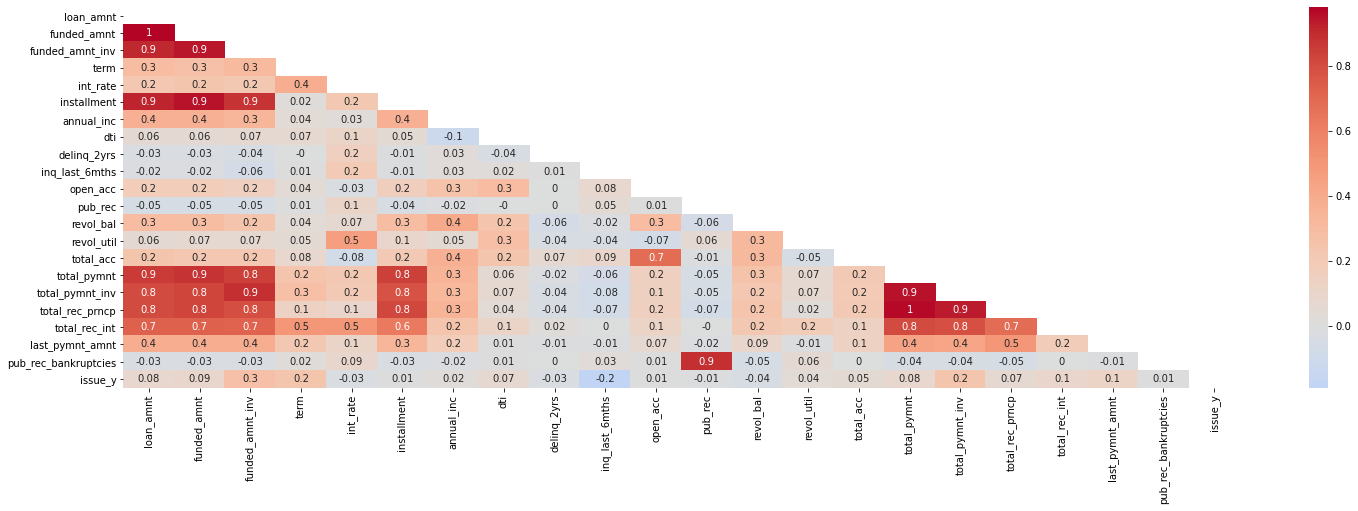

In [55]:
#heat map with correlations
plt.figure(figsize=(25, 7))
mask = np.triu(train_data.corr())
sns.heatmap(train_data.corr().round(2), 
            annot = True, 
            fmt='.1g', 
            center= 0, 
            cmap= 'coolwarm', 
            mask = mask);

## 02.06 Summary and Feature Selection

In [ ]:
tbd